## Exploring csv file

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from tqdm import tqdm 
import re
import ast 

In [2]:
df= pd.read_csv("train.csv")

In [3]:
df.describe()

,untagged_sentence,tagged_sentence
count,47340,47340
unique,46610,46637
top,['.'],"[(')', ')')]"
freq,52,46


In [4]:
df.head(n=10)

,untagged_sentence,tagged_sentence
0,"['The', 'jury', 'further', 'said', 'in', 'term...","[('The', 'AT'), ('jury', 'NN'), ('further', 'R..."
1,"['The', 'September-October', 'term', 'jury', '...","[('The', 'AT'), ('September-October', 'NP'), (..."
2,"['``', 'Only', 'a', 'relative', 'handful', 'of...","[('``', '``'), ('Only', 'RB'), ('a', 'AT'), ('..."
3,"['The', 'jury', 'said', 'it', 'did', 'find', '...","[('The', 'AT'), ('jury', 'NN'), ('said', 'VB')..."
4,"['It', 'recommended', 'that', 'Fulton', 'legis...","[('It', 'PP'), ('recommended', 'VB'), ('that',..."
5,"['The', 'grand', 'jury', 'commented', 'on', 'a...","[('The', 'AT'), ('grand', 'JJ'), ('jury', 'NN'..."
6,"['Merger', 'proposed']","[('Merger', 'NN'), ('proposed', 'VB')]"
7,"['However', ',', 'the', 'jury', 'said', 'it', ...","[('However', 'WR'), (',', ','), ('the', 'AT'),..."
8,"['The', 'City', 'Purchasing', 'Department', ',...","[('The', 'AT'), ('City', 'NN'), ('Purchasing',..."
9,"['It', 'urged', 'that', 'the', 'city', '``', '...","[('It', 'PP'), ('urged', 'VB'), ('that', 'CS')..."


In [5]:
data = []
for index, row in tqdm(df.iterrows()):
    data.append(ast.literal_eval(row['tagged_sentence'])) # changing data-type of entries from 'str' to 'list'

47340it [00:08, 5390.89it/s]


In [6]:
# data[0]
dict_train_tokens={}
dict_train_tags={}
len_of_data= len(data)
for lists in data:
    for tuples in lists:
        token= tuples[0]
        tag= tuples[1]
    
        if token in dict_train_tokens:
            dict_train_tokens[token]+=1
        else:
            dict_train_tokens[token]=1
            
        if tag in dict_train_tags:
            dict_train_tags[tag]+=1
        else:
            dict_train_tags[tag]=1
        
    

In [7]:
def plot_histogram(freq_map, type):
    items, frequencies = zip(*freq_map.items())


    plt.bar(items, frequencies, color='blue')


    plt.xlabel(type)
    plt.ylabel('Frequency')
    plt.title(f'{type} Distribution')


    plt.xticks(rotation=90, ha='right')
    plt.subplots_adjust(bottom=0.2)
    
    for item, frequency in zip(items, frequencies):
        plt.scatter(item, frequency, color='red', s=30)  

    plt.show()


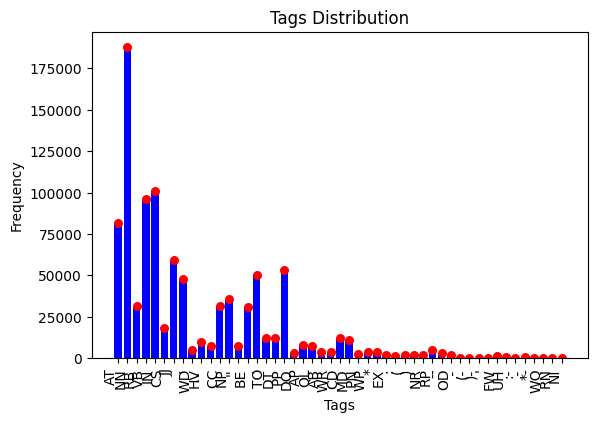

In [8]:

plot_histogram(dict_train_tags, "Tags")

In [9]:
dict_train_tags

{'AT': 81648,
 'NN': 187719,
 'RB': 31254,
 'VB': 95801,
 'IN': 101008,
 'CS': 18395,
 'JJ': 59247,
 ',': 48005,
 'WD': 4612,
 'HV': 9898,
 '``': 7286,
 'CC': 31492,
 'NP': 35648,
 "''": 7236,
 'BE': 31102,
 '.': 50065,
 'TO': 12367,
 'DT': 12105,
 'PP': 52944,
 'DO': 3172,
 'AP': 7909,
 'QL': 7452,
 'AB': 3448,
 'WR': 3744,
 'CD': 12245,
 'MD': 11098,
 'PN': 2206,
 'WP': 3757,
 '*': 3790,
 'EX': 1861,
 ':': 1273,
 '(': 1850,
 ')': 1851,
 'NR': 1650,
 'RP': 4961,
 '--': 2794,
 'OD': 1769,
 ',-': 147,
 '(-': 135,
 ')-': 153,
 "'": 268,
 'FW': 991,
 'UH': 523,
 ':-': 131,
 '.-': 519,
 '*-': 9,
 'WQ': 154,
 'RN': 9,
 'NI': 148}

## Making tables

### Emission Probabilities

In [10]:
dict_emission_probs={}

In [11]:
len_train_tags=len(dict_train_tags)
len_train_tokens=len(dict_train_tokens)
print(len_train_tags)

49


In [12]:
dict_index_to_tags={}
dict_tags_to_index={}

idx=2

for tag in dict_train_tags:
    if idx not in dict_index_to_tags:
        dict_index_to_tags[idx]= tag 
        dict_tags_to_index[tag]= idx 
    idx+=1
    

In [13]:
dict_index_to_tags[0]= 'Start'
dict_tags_to_index['Start']= 0

dict_index_to_tags[1]= 'Unknown'
dict_tags_to_index['Unknown']= 1


dict_index_to_tags[idx]= 'End'
dict_tags_to_index['End']= idx 
print(idx)

51


In [14]:
dict_index_to_tokens={}
dict_tokens_to_index={}
idx=0

for token in dict_train_tokens:
    if idx not in dict_index_to_tokens:
        dict_index_to_tokens[idx]= token
        dict_tokens_to_index[token]=idx
    idx+=1

In [15]:

print(len(dict_tags_to_index))

52


In [16]:
dict_index_to_tags[2],dict_tags_to_index["AT"]

('AT', 2)

In [17]:
emission_prob_matrix= np.zeros((len_train_tokens, len_train_tags+3))

In [18]:
emission_prob_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
for lists in data:
    for tuples in lists:
        token= tuples[0]
        tag= tuples[1]
        
        emission_prob_matrix[dict_tokens_to_index[token]][dict_tags_to_index[tag]]+=1
        
        

In [20]:
emission_prob_matrix.shape

(51208, 52)

In [21]:

column_sums = emission_prob_matrix.sum(axis=0)

# Normalize columns that do not sum to 0
for i, col_sum in enumerate(column_sums):
    if col_sum > 0:
        emission_prob_matrix[:, i] /= col_sum
    # If col sum is 0, we skip the column as per the instruction

emission_prob_matrix

array([[0.        , 0.        , 0.07253086, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [22]:
non_zero_count = np.count_nonzero(emission_prob_matrix)

# Count zero values
zero_count = emission_prob_matrix.size - non_zero_count

print("Non-zero count:", non_zero_count)
print("Zero count:", zero_count)

Non-zero count: 55311
Zero count: 2607505


In [23]:
column_sums = emission_prob_matrix.sum(axis=0)

In [24]:
column_sums

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0.])

### Transition Probabilties

In [25]:
data

[[('The', 'AT'),
  ('jury', 'NN'),
  ('further', 'RB'),
  ('said', 'VB'),
  ('in', 'IN'),
  ('term-end', 'NN'),
  ('presentments', 'NN'),
  ('that', 'CS'),
  ('the', 'AT'),
  ('City', 'NN'),
  ('Executive', 'JJ'),
  ('Committee', 'NN'),
  (',', ','),
  ('which', 'WD'),
  ('had', 'HV'),
  ('over-all', 'JJ'),
  ('charge', 'NN'),
  ('of', 'IN'),
  ('the', 'AT'),
  ('election', 'NN'),
  (',', ','),
  ('``', '``'),
  ('deserves', 'VB'),
  ('the', 'AT'),
  ('praise', 'NN'),
  ('and', 'CC'),
  ('thanks', 'NN'),
  ('of', 'IN'),
  ('the', 'AT'),
  ('City', 'NN'),
  ('of', 'IN'),
  ('Atlanta', 'NP'),
  ("''", "''"),
  ('for', 'IN'),
  ('the', 'AT'),
  ('manner', 'NN'),
  ('in', 'IN'),
  ('which', 'WD'),
  ('the', 'AT'),
  ('election', 'NN'),
  ('was', 'BE'),
  ('conducted', 'VB'),
  ('.', '.')],
 [('The', 'AT'),
  ('September-October', 'NP'),
  ('term', 'NN'),
  ('jury', 'NN'),
  ('had', 'HV'),
  ('been', 'BE'),
  ('charged', 'VB'),
  ('by', 'IN'),
  ('Fulton', 'NP'),
  ('Superior', 'JJ'),
  ('C

In [26]:
transition_prob_matrix= np.zeros((len_train_tags+3, len_train_tags+3))

In [27]:
data

[[('The', 'AT'),
  ('jury', 'NN'),
  ('further', 'RB'),
  ('said', 'VB'),
  ('in', 'IN'),
  ('term-end', 'NN'),
  ('presentments', 'NN'),
  ('that', 'CS'),
  ('the', 'AT'),
  ('City', 'NN'),
  ('Executive', 'JJ'),
  ('Committee', 'NN'),
  (',', ','),
  ('which', 'WD'),
  ('had', 'HV'),
  ('over-all', 'JJ'),
  ('charge', 'NN'),
  ('of', 'IN'),
  ('the', 'AT'),
  ('election', 'NN'),
  (',', ','),
  ('``', '``'),
  ('deserves', 'VB'),
  ('the', 'AT'),
  ('praise', 'NN'),
  ('and', 'CC'),
  ('thanks', 'NN'),
  ('of', 'IN'),
  ('the', 'AT'),
  ('City', 'NN'),
  ('of', 'IN'),
  ('Atlanta', 'NP'),
  ("''", "''"),
  ('for', 'IN'),
  ('the', 'AT'),
  ('manner', 'NN'),
  ('in', 'IN'),
  ('which', 'WD'),
  ('the', 'AT'),
  ('election', 'NN'),
  ('was', 'BE'),
  ('conducted', 'VB'),
  ('.', '.')],
 [('The', 'AT'),
  ('September-October', 'NP'),
  ('term', 'NN'),
  ('jury', 'NN'),
  ('had', 'HV'),
  ('been', 'BE'),
  ('charged', 'VB'),
  ('by', 'IN'),
  ('Fulton', 'NP'),
  ('Superior', 'JJ'),
  ('C

In [28]:
for list in data:
    len_list= len(list)
    for tuple_index in range(len_list-1):
        first_tuple_tag= list[tuple_index][1]
        second_tuple_tag= list[tuple_index+1][1]
        if tuple_index==0:
            transition_prob_matrix[dict_tags_to_index['Start']][dict_tags_to_index[first_tuple_tag]]+=1
            
        elif tuple_index==len_list-1-1:
            transition_prob_matrix[dict_tags_to_index[second_tuple_tag]][dict_tags_to_index['End']]+=1
        
        
        else:
            transition_prob_matrix[dict_tags_to_index[first_tuple_tag]][dict_tags_to_index[second_tuple_tag]]+=1
            
    

In [29]:
row_sums = transition_prob_matrix.sum(axis=1)

# Normalize rows that do not sum to 0
for i, row_sum in enumerate(row_sums):
    if row_sum > 0:
        transition_prob_matrix[i, :] /= row_sum
    # If row sum is 0, we skip the row as per the instruction

print(transition_prob_matrix)


[[0.00000000e+00 0.00000000e+00 1.47079447e-01 ... 0.00000000e+00
  6.37443427e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.33910039e-05 ... 0.00000000e+00
  1.33910039e-05 1.33910039e-04]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.11111111e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  8.61313869e-01 7.29927007e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [30]:
non_zero_count = np.count_nonzero(transition_prob_matrix)

# Count zero values
zero_count = transition_prob_matrix.size - non_zero_count

print("Non-zero count:", non_zero_count)
print("Zero count:", zero_count)

Non-zero count: 1544
Zero count: 1160


In [31]:
row_sums = transition_prob_matrix.sum(axis=1)
row_sums

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0.])

In [32]:
transition_prob_matrix[:,-1]

array([0.00000000e+00, 0.00000000e+00, 1.33910039e-04, 2.56760751e-03,
       4.64486162e-04, 4.78868534e-04, 5.16502247e-05, 6.04156597e-05,
       3.03951368e-04, 2.91776083e-04, 0.00000000e+00, 0.00000000e+00,
       5.46732622e-03, 6.87049124e-05, 1.85241319e-03, 8.08127453e-03,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00542932e-04,
       9.43329481e-05, 3.43406593e-04, 1.36817622e-04, 1.39120757e-04,
       0.00000000e+00, 0.00000000e+00, 3.99429387e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.25925926e-01, 6.10500611e-04, 1.71184023e-02, 1.49476831e-03,
       1.78292846e-03, 3.10463779e-02, 0.00000000e+00, 1.65289256e-02,
       0.00000000e+00, 9.20000000e-01, 3.14960630e-02, 0.00000000e+00,
       0.00000000e+00, 7.30434783e-01, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.11111111e-01, 7.29927007e-03, 0.00000000e+00])

## Exploring csv file

In [33]:
# !pip install seaborn

In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from tqdm import tqdm 
import seaborn as sns 
import ast 

In [35]:
df= pd.read_csv("train.csv")

In [36]:
df.describe()

,untagged_sentence,tagged_sentence
count,47340,47340
unique,46610,46637
top,['.'],"[(')', ')')]"
freq,52,46


In [37]:
df.head(n=10)

,untagged_sentence,tagged_sentence
0,"['The', 'jury', 'further', 'said', 'in', 'term...","[('The', 'AT'), ('jury', 'NN'), ('further', 'R..."
1,"['The', 'September-October', 'term', 'jury', '...","[('The', 'AT'), ('September-October', 'NP'), (..."
2,"['``', 'Only', 'a', 'relative', 'handful', 'of...","[('``', '``'), ('Only', 'RB'), ('a', 'AT'), ('..."
3,"['The', 'jury', 'said', 'it', 'did', 'find', '...","[('The', 'AT'), ('jury', 'NN'), ('said', 'VB')..."
4,"['It', 'recommended', 'that', 'Fulton', 'legis...","[('It', 'PP'), ('recommended', 'VB'), ('that',..."
5,"['The', 'grand', 'jury', 'commented', 'on', 'a...","[('The', 'AT'), ('grand', 'JJ'), ('jury', 'NN'..."
6,"['Merger', 'proposed']","[('Merger', 'NN'), ('proposed', 'VB')]"
7,"['However', ',', 'the', 'jury', 'said', 'it', ...","[('However', 'WR'), (',', ','), ('the', 'AT'),..."
8,"['The', 'City', 'Purchasing', 'Department', ',...","[('The', 'AT'), ('City', 'NN'), ('Purchasing',..."
9,"['It', 'urged', 'that', 'the', 'city', '``', '...","[('It', 'PP'), ('urged', 'VB'), ('that', 'CS')..."


In [38]:
data = []
for index, row in tqdm(df.iterrows()):
    data.append(ast.literal_eval(row['tagged_sentence'])) # changing data-type of entries from 'str' to 'list'

0it [00:00, ?it/s]

47340it [00:08, 5307.92it/s]


In [39]:
# data[0]
dict_train_tokens={}
dict_train_tags={}
len_of_data= len(data)
for lists in data:
    for tuples in lists:
        token= tuples[0]
        tag= tuples[1]
    
        if token in dict_train_tokens:
            dict_train_tokens[token]+=1
        else:
            dict_train_tokens[token]=1
            
        if tag in dict_train_tags:
            dict_train_tags[tag]+=1
        else:
            dict_train_tags[tag]=1
        
    

In [40]:
def plot_histogram(freq_map, type):
    items, frequencies = zip(*freq_map.items())


    plt.bar(items, frequencies, color='blue')


    plt.xlabel(type)
    plt.ylabel('Frequency')
    plt.title(f'{type} Distribution')


    plt.xticks(rotation=90, ha='right')
    plt.subplots_adjust(bottom=0.2)
    
    for item, frequency in zip(items, frequencies):
        plt.scatter(item, frequency, color='red', s=30)  

    plt.show()


In [41]:
dict_train_tags

{'AT': 81648,
 'NN': 187719,
 'RB': 31254,
 'VB': 95801,
 'IN': 101008,
 'CS': 18395,
 'JJ': 59247,
 ',': 48005,
 'WD': 4612,
 'HV': 9898,
 '``': 7286,
 'CC': 31492,
 'NP': 35648,
 "''": 7236,
 'BE': 31102,
 '.': 50065,
 'TO': 12367,
 'DT': 12105,
 'PP': 52944,
 'DO': 3172,
 'AP': 7909,
 'QL': 7452,
 'AB': 3448,
 'WR': 3744,
 'CD': 12245,
 'MD': 11098,
 'PN': 2206,
 'WP': 3757,
 '*': 3790,
 'EX': 1861,
 ':': 1273,
 '(': 1850,
 ')': 1851,
 'NR': 1650,
 'RP': 4961,
 '--': 2794,
 'OD': 1769,
 ',-': 147,
 '(-': 135,
 ')-': 153,
 "'": 268,
 'FW': 991,
 'UH': 523,
 ':-': 131,
 '.-': 519,
 '*-': 9,
 'WQ': 154,
 'RN': 9,
 'NI': 148}

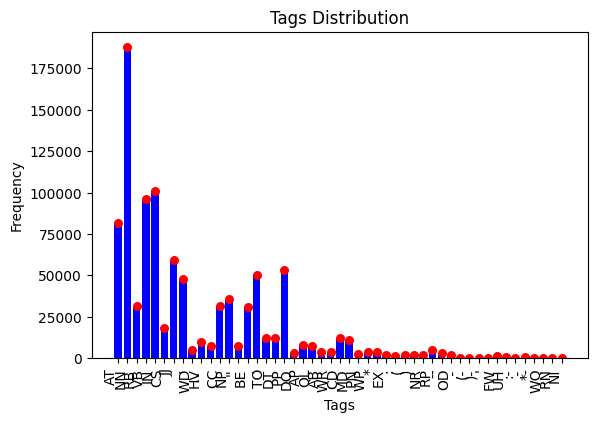

In [42]:

plot_histogram(dict_train_tags, "Tags")

## Making tables

### Emission Probabilities

In [43]:
dict_emission_probs={}

In [44]:
len_train_tags=len(dict_train_tags)
len_train_tokens=len(dict_train_tokens)
print(len_train_tags)

49


In [45]:
dict_index_to_tags={}
dict_tags_to_index={}

idx=1

for tag in dict_train_tags:
    if idx not in dict_index_to_tags:
        dict_index_to_tags[idx]= tag 
        dict_tags_to_index[tag]= idx 
    idx+=1
    

In [46]:
dict_index_to_tags[0]= 'Start'
dict_tags_to_index['Start']= 0


dict_index_to_tags[idx]= 'End'
dict_tags_to_index['End']= idx 
print(idx)

50


In [47]:
dict_index_to_tokens={}
dict_tokens_to_index={}
idx=0

for token in dict_train_tokens:
    if idx not in dict_index_to_tokens:
        dict_index_to_tokens[idx]= token
        dict_tokens_to_index[token]=idx
    idx+=1

In [48]:

data

[[('The', 'AT'),
  ('jury', 'NN'),
  ('further', 'RB'),
  ('said', 'VB'),
  ('in', 'IN'),
  ('term-end', 'NN'),
  ('presentments', 'NN'),
  ('that', 'CS'),
  ('the', 'AT'),
  ('City', 'NN'),
  ('Executive', 'JJ'),
  ('Committee', 'NN'),
  (',', ','),
  ('which', 'WD'),
  ('had', 'HV'),
  ('over-all', 'JJ'),
  ('charge', 'NN'),
  ('of', 'IN'),
  ('the', 'AT'),
  ('election', 'NN'),
  (',', ','),
  ('``', '``'),
  ('deserves', 'VB'),
  ('the', 'AT'),
  ('praise', 'NN'),
  ('and', 'CC'),
  ('thanks', 'NN'),
  ('of', 'IN'),
  ('the', 'AT'),
  ('City', 'NN'),
  ('of', 'IN'),
  ('Atlanta', 'NP'),
  ("''", "''"),
  ('for', 'IN'),
  ('the', 'AT'),
  ('manner', 'NN'),
  ('in', 'IN'),
  ('which', 'WD'),
  ('the', 'AT'),
  ('election', 'NN'),
  ('was', 'BE'),
  ('conducted', 'VB'),
  ('.', '.')],
 [('The', 'AT'),
  ('September-October', 'NP'),
  ('term', 'NN'),
  ('jury', 'NN'),
  ('had', 'HV'),
  ('been', 'BE'),
  ('charged', 'VB'),
  ('by', 'IN'),
  ('Fulton', 'NP'),
  ('Superior', 'JJ'),
  ('C

In [49]:

print(len(dict_tags_to_index))

51


In [50]:
dict_tags_to_index, dict_index_to_tags

({'AT': 1,
  'NN': 2,
  'RB': 3,
  'VB': 4,
  'IN': 5,
  'CS': 6,
  'JJ': 7,
  ',': 8,
  'WD': 9,
  'HV': 10,
  '``': 11,
  'CC': 12,
  'NP': 13,
  "''": 14,
  'BE': 15,
  '.': 16,
  'TO': 17,
  'DT': 18,
  'PP': 19,
  'DO': 20,
  'AP': 21,
  'QL': 22,
  'AB': 23,
  'WR': 24,
  'CD': 25,
  'MD': 26,
  'PN': 27,
  'WP': 28,
  '*': 29,
  'EX': 30,
  ':': 31,
  '(': 32,
  ')': 33,
  'NR': 34,
  'RP': 35,
  '--': 36,
  'OD': 37,
  ',-': 38,
  '(-': 39,
  ')-': 40,
  "'": 41,
  'FW': 42,
  'UH': 43,
  ':-': 44,
  '.-': 45,
  '*-': 46,
  'WQ': 47,
  'RN': 48,
  'NI': 49,
  'Start': 0,
  'End': 50},
 {1: 'AT',
  2: 'NN',
  3: 'RB',
  4: 'VB',
  5: 'IN',
  6: 'CS',
  7: 'JJ',
  8: ',',
  9: 'WD',
  10: 'HV',
  11: '``',
  12: 'CC',
  13: 'NP',
  14: "''",
  15: 'BE',
  16: '.',
  17: 'TO',
  18: 'DT',
  19: 'PP',
  20: 'DO',
  21: 'AP',
  22: 'QL',
  23: 'AB',
  24: 'WR',
  25: 'CD',
  26: 'MD',
  27: 'PN',
  28: 'WP',
  29: '*',
  30: 'EX',
  31: ':',
  32: '(',
  33: ')',
  34: 'NR',
  35: '

In [51]:
dict_index_to_tags[2],dict_tags_to_index["NN"]

('NN', 2)

In [52]:
emission_prob_matrix= np.zeros((len_train_tokens, len_train_tags+2))

In [53]:
emission_prob_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
for lists in data:
    for tuples in lists:
        token= tuples[0]
        tag= tuples[1]
        
        emission_prob_matrix[dict_tokens_to_index[token]][dict_tags_to_index[tag]]+=1
        
        

In [55]:
emission_prob_matrix.shape

(51208, 51)

In [56]:

column_sums = emission_prob_matrix.sum(axis=0)

# Normalize columns that do not sum to 0
for i, col_sum in enumerate(column_sums):
    if col_sum > 0:
        emission_prob_matrix[:, i] /= col_sum
    # If col sum is 0, we skip the column as per the instruction

emission_prob_matrix

array([[0.00000000e+00, 7.25308642e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.77009786e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 5.32711127e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [57]:
non_zero_count = np.count_nonzero(emission_prob_matrix)

# Count zero values
zero_count = emission_prob_matrix.size - non_zero_count

print("Non-zero count:", non_zero_count)
print("Zero count:", zero_count)

Non-zero count: 55311
Zero count: 2556297


In [58]:
column_sums = emission_prob_matrix.sum(axis=0)

In [59]:
column_sums

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.])

### Transition Probabilties

In [60]:
data

[[('The', 'AT'),
  ('jury', 'NN'),
  ('further', 'RB'),
  ('said', 'VB'),
  ('in', 'IN'),
  ('term-end', 'NN'),
  ('presentments', 'NN'),
  ('that', 'CS'),
  ('the', 'AT'),
  ('City', 'NN'),
  ('Executive', 'JJ'),
  ('Committee', 'NN'),
  (',', ','),
  ('which', 'WD'),
  ('had', 'HV'),
  ('over-all', 'JJ'),
  ('charge', 'NN'),
  ('of', 'IN'),
  ('the', 'AT'),
  ('election', 'NN'),
  (',', ','),
  ('``', '``'),
  ('deserves', 'VB'),
  ('the', 'AT'),
  ('praise', 'NN'),
  ('and', 'CC'),
  ('thanks', 'NN'),
  ('of', 'IN'),
  ('the', 'AT'),
  ('City', 'NN'),
  ('of', 'IN'),
  ('Atlanta', 'NP'),
  ("''", "''"),
  ('for', 'IN'),
  ('the', 'AT'),
  ('manner', 'NN'),
  ('in', 'IN'),
  ('which', 'WD'),
  ('the', 'AT'),
  ('election', 'NN'),
  ('was', 'BE'),
  ('conducted', 'VB'),
  ('.', '.')],
 [('The', 'AT'),
  ('September-October', 'NP'),
  ('term', 'NN'),
  ('jury', 'NN'),
  ('had', 'HV'),
  ('been', 'BE'),
  ('charged', 'VB'),
  ('by', 'IN'),
  ('Fulton', 'NP'),
  ('Superior', 'JJ'),
  ('C

In [61]:
transition_prob_matrix= np.zeros((len_train_tags+2, len_train_tags+2))

In [62]:
data

[[('The', 'AT'),
  ('jury', 'NN'),
  ('further', 'RB'),
  ('said', 'VB'),
  ('in', 'IN'),
  ('term-end', 'NN'),
  ('presentments', 'NN'),
  ('that', 'CS'),
  ('the', 'AT'),
  ('City', 'NN'),
  ('Executive', 'JJ'),
  ('Committee', 'NN'),
  (',', ','),
  ('which', 'WD'),
  ('had', 'HV'),
  ('over-all', 'JJ'),
  ('charge', 'NN'),
  ('of', 'IN'),
  ('the', 'AT'),
  ('election', 'NN'),
  (',', ','),
  ('``', '``'),
  ('deserves', 'VB'),
  ('the', 'AT'),
  ('praise', 'NN'),
  ('and', 'CC'),
  ('thanks', 'NN'),
  ('of', 'IN'),
  ('the', 'AT'),
  ('City', 'NN'),
  ('of', 'IN'),
  ('Atlanta', 'NP'),
  ("''", "''"),
  ('for', 'IN'),
  ('the', 'AT'),
  ('manner', 'NN'),
  ('in', 'IN'),
  ('which', 'WD'),
  ('the', 'AT'),
  ('election', 'NN'),
  ('was', 'BE'),
  ('conducted', 'VB'),
  ('.', '.')],
 [('The', 'AT'),
  ('September-October', 'NP'),
  ('term', 'NN'),
  ('jury', 'NN'),
  ('had', 'HV'),
  ('been', 'BE'),
  ('charged', 'VB'),
  ('by', 'IN'),
  ('Fulton', 'NP'),
  ('Superior', 'JJ'),
  ('C

In [63]:
for list in data:
    len_list= len(list)
    for tuple_index in range(len_list-1):
        first_tuple_tag= list[tuple_index][1]
        second_tuple_tag= list[tuple_index+1][1]
        if tuple_index==0:
            transition_prob_matrix[dict_tags_to_index['Start']][dict_tags_to_index[first_tuple_tag]]+=1
            
        elif tuple_index==len_list-1-1:
            transition_prob_matrix[dict_tags_to_index[second_tuple_tag]][dict_tags_to_index['End']]+=1
        
        
        else:
            transition_prob_matrix[dict_tags_to_index[first_tuple_tag]][dict_tags_to_index[second_tuple_tag]]+=1
            
    

In [64]:
row_sums = transition_prob_matrix.sum(axis=1)

# Normalize rows that do not sum to 0
for i, row_sum in enumerate(row_sums):
    if row_sum > 0:
        transition_prob_matrix[i, :] /= row_sum
    # If row sum is 0, we skip the row as per the instruction

print(transition_prob_matrix)


[[0.00000000e+00 1.47079447e-01 5.88360283e-02 ... 0.00000000e+00
  6.37443427e-05 0.00000000e+00]
 [0.00000000e+00 1.33910039e-05 6.09036249e-01 ... 0.00000000e+00
  1.33910039e-05 1.33910039e-04]
 [0.00000000e+00 7.74592385e-03 1.15628540e-01 ... 0.00000000e+00
  6.15733215e-05 2.56760751e-03]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.11111111e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  8.61313869e-01 7.29927007e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [65]:
non_zero_count = np.count_nonzero(transition_prob_matrix)

# Count zero values
zero_count = transition_prob_matrix.size - non_zero_count

print("Non-zero count:", non_zero_count)
print("Zero count:", zero_count)

Non-zero count: 1544
Zero count: 1057


In [66]:
row_sums = transition_prob_matrix.sum(axis=1)
row_sums

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.])

In [67]:
max_freq_tag= max(dict_train_tags, key=dict_train_tags.get)

In [68]:
max_freq_tag, dict_tags_to_index['NN']

('NN', 2)

In [69]:
# patterns = [
#     (r'^[aA-zZ].*[0-9]+','NN'),  # Alpha Numeric
#     (r'.*ness$', 'NN'),
#     (r'.*\'s$', 'NN'),              # possessive nouns
#     (r'.*s$', 'NN'),                # plural nouns
#     (r'.*', 'NN'),    
#     (r'.*ly$', 'AB'),
#     (r'^(0|([*|-|$].*))','NN'), # Any special character combination
#     (r'.*ould$', 'MD'), # modals
#     (r'(The|the|A|a|An|an)$', 'DT'),
#     (r'^([0-9]|[aA-zZ])+\-[aA-zZ]*$','JJ'),
#     (r'.*able$', 'JJ'), # adjective like 100-megabytes 237-Seats
#     (r'[aA-zZ]+(ed|ing|es)$', 'VB'), # Any word ending with 'ing' or 'ed' is a verb
#     (r'[0-9].?[,\/]?[0-9]*','NN')# Numbers 
#     ]

# {'AT': 81648,
#  'NN': 187719,
#  'RB': 31254,
#  'VB': 95801,
#  'IN': 101008,
#  'CS': 18395,
#  'JJ': 59247,
#  ',': 48005,
#  'WD': 4612,
#  'HV': 9898,
#  '``': 7286,
#  'CC': 31492,
#  'NP': 35648,
#  "''": 7236,
#  'BE': 31102,
#  '.': 50065,
#  'TO': 12367,
#  'DT': 12105,
#  'PP': 52944,
#  'DO': 3172,
#  'AP': 7909,
#  'QL': 7452,
#  'AB': 3448,
#  'WR': 3744,
#  'CD': 12245,
#  'MD': 11098,
#  'PN': 2206,
#  'WP': 3757,
#  '*': 3790,
#  'EX': 1861,
#  ':': 1273,
#  '(': 1850,
#  ')': 1851,
#  'NR': 1650,
#  'RP': 4961,
#  '--': 2794,
#  'OD': 1769,
#  ',-': 147,
#  '(-': 135,
#  ')-': 153,
#  "'": 268,
#  'FW': 991,
#  'UH': 523,
#  ':-': 131,
#  '.-': 519,
#  '*-': 9,
#  'WQ': 154,
#  'RN': 9,
#  'NI': 148}

In [70]:
# def tag_word(word, regex_tag_pairs):
#     """
#     Checks if the word matches any of the provided regular expressions and returns the associated tag.
    
#     :param word: The word to check against the regular expressions.
#     :param regex_tag_pairs: A list of tuples, each containing a regular expression and its associated tag.
#     :return: The tag associated with the first matching regular expression, or None if no match is found.
#     """
#     for regex, tag in regex_tag_pairs:
#         if re.search(regex, word):
#             return tag
#     return "NN"

In [71]:
dict_tags_to_index["PP"]

19

In [72]:
import random

In [73]:
# def viterbi_algorithm(sentence, transition_prob_matrix, emission_prob_matrix):
#     len_of_sentence= len(sentence)

#     dp= np.zeros((len(dict_tags_to_index)-2, len_of_sentence))

#     m,n= dp.shape

#     for i in range(m):
#         if sentence[0] not in dict_train_tokens:
#             dp[2][0]=1
#         else:
#             dp[i][0]= transition_prob_matrix[dict_tags_to_index['Start']][i]* emission_prob_matrix[dict_tokens_to_index[sentence[0]]][i]
        
#     for j in range(1,n):
#         for i in range(m):
#             for k in range(m):
#                 if sentence[j] not in dict_train_tokens:
#                     dp[2][j]=1
#                 elif sentence[j]== ""''"":
#                     dp[i][j]+= dp[k][j-1]*transition_prob_matrix[k][i]*emission_prob_matrix[14][i]
#                 else:
#                     dp[i][j]+= dp[k][j-1]*transition_prob_matrix[k][i]*emission_prob_matrix[dict_tokens_to_index[sentence[j]]][i]
    
#     list_preds=[]
#     for j in range(len(sentence)):
#         word= sentence[j]
#         tag= dict_index_to_tags[np.argmax(dp[:,j])]
#         list_preds.append((word,tag))
        
#     return list_preds 


In [74]:
# def viterbi_algorithm(sentence, transition_prob_matrix, emission_prob_matrix):
#     len_of_sentence= len(sentence)
    
#     dp= np.zeros(len(dict_tags_to_index)-2, len_of_sentence)
#     backpointers= np.zeros(len(dict_tags_to_index)-2, len_of_sentence)
    
#     m,n= dp.shape 
#     for i in range(m):
#         if sentence[0] not in dict_train_tokens:
#             dp[2][0]=1
#         else:
#             dp[i][0]= transition_prob_matrix[dict_tags_to_index['Start']][i]* emission_prob_matrix[dict_tokens_to_index[sentence[0]]][i]
            
#     for j in range(1,n):
#         for i in range(m):
#             max_prob= 0
            

In [75]:
# import numpy as np

# def viterbi_algorithm2(sentence, transition_prob_matrix, emission_prob_matrix):
#     len_of_sentence = len(sentence)

#     dp = np.zeros((len(dict_tags_to_index) - 2, len_of_sentence))
#     backpointers = np.zeros((len(dict_tags_to_index) - 2, len_of_sentence), dtype=int)

#     m, n = dp.shape

#     for i in range(m):
#         if sentence[0] not in dict_train_tokens:
#             dp[2][0]=1
#         else:
#             dp[i][0]= transition_prob_matrix[dict_tags_to_index['Start']][i]* emission_prob_matrix[dict_tokens_to_index[sentence[0]]][i]

#     for j in range(1, n):
#         for i in range(m):
#             max_prob = -1
#             prob=np.zeros((m,1))
#             pos=0
#             for k in range(m):
#                 if sentence[j] not in dict_train_tokens:
#                     dp[2][j]=1
#                 elif sentence[j]== ""''"":
#                     dp[i][j]= dp[k][j-1]*transition_prob_matrix[k][i]*emission_prob_matrix[14][i]

#                 else:
#                     dp[i][j] = dp[k][j-1]*transition_prob_matrix[k][i]*emission_prob_matrix[dict_tokens_to_index[sentence[j]]][i]
                    
#                 # prob= dp[i][j]
#                 prob[k][0] = dp[i][j]
#                 # if prob>max_prob:
#                 #     print("Inside if")
#                 #     max_prob= prob 
#                 #     pos= k
                    
#             # dp[i][j]= max_prob
#             dp[i][j] = np.max(prob)
            
#             # backpointers[i][j]= pos
#             backpointers[i][j]= np.argmax(prob)
                    

    
#     best_path = []
#     max_prob_index = np.argmax(dp[:, -1])
#     best_path.append(dict_index_to_tags[max_prob_index])
    
#     print(backpointers)
#     for j in range(n - 1, 0, -1):
#         max_prob_index = backpointers[max_prob_index][j]
#         # best_path.insert(0, max_prob_index)
#         best_path.insert(0, dict_index_to_tags[max_prob_index])
        
#     # if "fingers" in sentence:
#     # print(backpointers)
#     print(f"Best path is: {best_path}")

#     predictions=[]
#     for i in range(len_of_sentence):
#         word= sentence[i]
#         tag= best_path[i]
#         tup= (word, tag)
#         predictions.append(tup)
#     return predictions 


In [76]:
# import numpy as np

# def viterbi_algorithm2(sentence, transition_prob_matrix, emission_prob_matrix):
#     len_of_sentence = len(sentence)

#     dp = np.zeros((len(dict_tags_to_index) - 2, len_of_sentence))
#     backpointers = np.zeros((len(dict_tags_to_index) - 2, len_of_sentence), dtype=int)

#     m, n = dp.shape

#     for i in range(m):
#         if sentence[0] not in dict_train_tokens:
#             dp[2][0]=1
#         else:
#             dp[i][0]= transition_prob_matrix[dict_tags_to_index['Start']][i]* emission_prob_matrix[dict_tokens_to_index[sentence[0]]][i]

#     for j in range(1, n):
#         for i in range(m):
#             lis= dp[:,j-1].reshape(1,-1)
#             for k in range(m):
#                 # if sentence[j] not in dict_train_tokens:
#                 #     dp[2][j]=1 
                    
#                 if sentence[j]== ""''"":
#                     lis[0][k]=(lis[0][k])* (transition_prob_matrix[k][i])* (emission_prob_matrix[14][i])
#                 else:    
#                     lis[0][k]=(lis[0][k])* (transition_prob_matrix[k][i])* (emission_prob_matrix[dict_tokens_to_index[sentence[j]]][i])
#             maxpos=np.argmax(lis)
#             dp[i][j]=lis[0][maxpos]
#             backpointers[i][j]=maxpos
#         print(backpointers[:,j])
#         print(dp[:,j])
                    
            
                
                
#     best_path = []
#     max_prob_index = np.argmax(dp[:, -1])
#     best_path.append(dict_index_to_tags[max_prob_index])
    
#     print(backpointers)
#     for j in range(n - 1, 0, -1):
#         max_prob_index = backpointers[max_prob_index][j]
#         # best_path.insert(0, max_prob_index)
#         best_path.insert(0, dict_index_to_tags[max_prob_index])
        
#     # if "fingers" in sentence:
#     # print(backpointers)
#     print(f"Best path is: {best_path}")

#     predictions=[]
#     for i in range(len_of_sentence):
#         word= sentence[i]
#         tag= best_path[i]
#         tup= (word, tag)
#         predictions.append(tup)
#     return predictions 


In [77]:
# import numpy as np

# def viterbi_algorithm2(sentence, transition_prob_matrix, emission_prob_matrix):
#     len_of_sentence = len(sentence)

#     dp = np.zeros((len(dict_tags_to_index) - 2, len_of_sentence))
#     backpointers = np.zeros((len(dict_tags_to_index) - 2, len_of_sentence), dtype=int)

#     m, n = dp.shape

#     for i in range(m):
#         if sentence[0] not in dict_train_tokens:
#             dp[i][0] = 1
#         else:
#             dp[i][0] = transition_prob_matrix[dict_tags_to_index['Start']][i] * emission_prob_matrix[dict_tokens_to_index.get(sentence[0], 0)][i]

#     for j in range(1, n):
#         for i in range(m):
#             lis = []
#             for k in range(m):
#                 if sentence[j] == "":
#                     prob = dp[k][j - 1] * transition_prob_matrix[k][i] * emission_prob_matrix[14][i]
#                 else:
#                     prob = dp[k][j - 1] * transition_prob_matrix[k][i] * emission_prob_matrix[dict_tokens_to_index.get(sentence[j], 0)][i]
#                 lis.append(prob)

#             maxpos = np.argmax(lis)
#             dp[i][j] = lis[maxpos]
#             backpointers[i][j] = maxpos

#     best_path = []
#     max_prob_index = np.argmax(dp[:, -1])
#     best_path.append(dict_index_to_tags[max_prob_index])

#     for j in range(n - 1, 0, -1):
#         max_prob_index = backpointers[max_prob_index][j]
#         best_path.insert(0, dict_index_to_tags[max_prob_index])

#     predictions = list(zip(sentence, best_path))
#     return predictions

# # Example usage:
# # Replace placeholders with actual matrices and dictionaries



In [78]:
# sentence= ['then', ',', 'to', 'better']

# for token in sentence:
#     if token not in dict_tokens_to_index:
#         print(f"Token not : {token}")
#     # print(dict_tokens_to_index[token])
    

In [79]:
#Emission Matrix
emission_prob_matrix= np.zeros((len_train_tokens, len_train_tags+2))
emission_prob_matrix
for lists in data:
    for tuples in lists:
        token= tuples[0]
        tag= tuples[1]
        
        emission_prob_matrix[dict_tokens_to_index[token]][dict_tags_to_index[tag]]+=1
        
        
print(emission_prob_matrix.shape)


column_sums = emission_prob_matrix.sum(axis=0)

for i, col_sum in enumerate(column_sums):
    if col_sum > 0:
        emission_prob_matrix[:, i] /= col_sum

print(emission_prob_matrix)

(51208, 51)
[[0.00000000e+00 7.25308642e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.77009786e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.32711127e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [80]:
#Transition Matrix
transition_prob_matrix= np.zeros((len_train_tags+2, len_train_tags+2))

for list in data:
    len_list= len(list)
    for tuple_index in range(len_list-1):
        first_tuple_tag= list[tuple_index][1] 
        second_tuple_tag= list[tuple_index+1][1]
        if tuple_index==0:
            transition_prob_matrix[dict_tags_to_index[first_tuple_tag]][dict_tags_to_index['Start']]+=1
            
        elif tuple_index==len_list-1-1:
            transition_prob_matrix[dict_tags_to_index['End']][dict_tags_to_index[second_tuple_tag]]+=1
        
        
        else:
            transition_prob_matrix[dict_tags_to_index[second_tuple_tag]][dict_tags_to_index[first_tuple_tag]]+=1
            
            
print(transition_prob_matrix.shape)  
row_sums = transition_prob_matrix.sum(axis=1)
for i, row_sum in enumerate(row_sums):
    if row_sum > 0:
        transition_prob_matrix[i, :] /= row_sum
print(transition_prob_matrix)
            

            
    


(51, 51)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.84205148e-02 1.27738392e-05 1.60694897e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.55616001e-02 2.55600265e-01 1.05536760e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.08333333e-02 6.94444444e-03 6.94444444e-02 ... 0.00000000e+00
  8.19444444e-01 0.00000000e+00]
 [0.00000000e+00 2.15317701e-04 8.97874814e-03 ... 2.15317701e-05
  2.15317701e-05 0.00000000e+00]]


In [81]:
# def viterbi_algorithm(sentence, transition_prob_matrix, emission_prob_matrix):
#     len_of_sentence= len(sentence)
    
#     dp= np.ones((len_train_tags,len_of_sentence))
#     # bp= np.zeros((len_train_tags, len_of_sentence))
    
#     m,n= dp.shape
    
#     for i in range(m):
#         if sentence[0] not in dict_train_tokens:
#             tg= "NN"
#             dp[dict_tags_to_index[tg]][0]=1
#         elif sentence[0]== ""''"":
#             dp[i][0]= transition_prob_matrix[i][14]*emission_prob_matrix[i][14]
#         else:
#             dp[i][0]= transition_prob_matrix[i][dict_tags_to_index["Start"]]* emission_prob_matrix[dict_tokens_to_index[sentence[0]]][i]
            
#     for j in range(1,n):
#         for i in range(m):
#             max_prob=-1
#             for k in range(m):
#                 if sentence[j] not in dict_train_tokens:
#                     tg= "NN"
#                     dp[dict_tags_to_index[tg]][j]=1
#                     max_prob=1
                    
#                 elif sentence[j]== ""''"":
#                     dp[i][j]= dp[k][j-1] * transition_prob_matrix[i][k] * emission_prob_matrix[14][i]
#                 else:
#                     dp[i][j]= dp[k][j-1] * transition_prob_matrix[i][k] * emission_prob_matrix[dict_tokens_to_index[sentence[j]]][i]
                    
#                     if dp[i][j]> max_prob:
#                         max_prob= dp[i][j]

#             dp[i][j]= max_prob
                                
#     return dp  
    
    
# # for j in range(1,n):
# #         for i in range(m):
# #             for k in range(m):
# #                 if sentence[j] not in dict_train_tokens:
# #                     dp[2][j]=1
# #                 elif sentence[j]== ""''"":
# #                     dp[i][j]+= dp[k][j-1]*transition_prob_matrix[k][i]*emission_prob_matrix[14][i]
# #                 else:
# #                     dp[i][j]+= dp[k][j-1]*transition_prob_matrix[k][i]*emission_prob_matrix[dict_tokens_to_index[sentence[j]]][i]


In [109]:
dict_index_to_tags[0], dict_index_to_tags[1], dict_index_to_tags[2]

('Start', 'AT', 'NN')

In [144]:
# def viterbi_algorithm(sentence, transition_prob_matrix, emission_prob_matrix):
#     len_of_sentence= len(sentence)
    
#     dp= np.zeros((len_train_tags,len_of_sentence))
#     bp= np.zeros((len_train_tags, len_of_sentence))
    
#     m,n= dp.shape
    
#     for i in range(m):
#         if sentence[0] not in dict_train_tokens:
#             tg= "NN"
#             dp[dict_tags_to_index[tg]][0]=1
#         elif sentence[0]== ""''"":
#             dp[i][0]= transition_prob_matrix[i][14]*emission_prob_matrix[i][14]
#         else:
#             dp[i][0]= transition_prob_matrix[i][dict_tags_to_index["Start"]]* emission_prob_matrix[dict_tokens_to_index[sentence[0]]][i]
            
#     # print(f"Intermediate dp is: {dp}")         
#     for j in range(1,n):
#         for i in range(m):
#             prob=0
#             max_prob=-1
#             max_prob_wo_emission=-1
#             pos=0
#             for k in range(m):
#                 prob_wo_emission= dp[k][j-1]*transition_prob_matrix[i][k]
#                 prob= prob_wo_emission*emission_prob_matrix[dict_tokens_to_index[sentence[j]]][i]
#                 if prob>max_prob:
#                     max_prob= prob
                    
#                 if prob_wo_emission>max_prob_wo_emission:
#                     max_prob_wo_emission= prob_wo_emission
#                     pos=k
                
#             dp[i][j]= max_prob 
#             bp[i][j]=pos
#     return bp, dp
                
            
    # for j in range(1,n):
    #     for i in range(m):
    #         max_prob=-1
    #         pos=0
    #         for k in range(m):
    #             if sentence[j] not in dict_train_tokens:
    #                 tg= "NN"
    #                 dp[dict_tags_to_index[tg]][j]=1
    #                 bp[i][j]= dict_tags_to_index[tg]
    #                 max_prob=1
                    
    #             elif sentence[j]== ""''"":
    #                 dp[i][j]= dp[k][j-1] * transition_prob_matrix[i][k] * emission_prob_matrix[14][i]
                    
    #                 if dp[i][j]> max_prob:
    #                     max_prob= dp[i][j]
    #                     pos= 14                 
    #             else:
    #                 dp[i][j]= dp[k][j-1] * transition_prob_matrix[i][k] * emission_prob_matrix[dict_tokens_to_index[sentence[j]]][k]
                    
    #                 if dp[i][j]> max_prob:
    #                     max_prob= dp[i][j]
    #                     pos= k
    #             bp[i][j]= pos
            
    #             dp[i][j]= max_prob
                                  
    # return bp    
    
    
# # for j in range(1,n):
# #         for i in range(m):
# #             for k in range(m):
# #                 if sentence[j] not in dict_train_tokens:
# #                     dp[2][j]=1
# #                 elif sentence[j]== ""''"":
# #                     dp[i][j]+= dp[k][j-1]*transition_prob_matrix[k][i]*emission_prob_matrix[14][i]
# #                 else:
# #                     dp[i][j]+= dp[k][j-1]*transition_prob_matrix[k][i]*emission_prob_matrix[dict_tokens_to_index[sentence[j]]][i]





# def viterbi_algorithm(sentence, transition_prob_matrix, emission_prob_matrix):
#     len_of_sentence= len(sentence)
    
#     dp= np.ones((len_train_tags,len_of_sentence))
#     # bp= np.zeros((len_train_tags, len_of_sentence))
    
#     m,n= dp.shape
    
#     for i in range(m):
#         if sentence[0] not in dict_train_tokens:
#             tg= "NN"
#             dp[dict_tags_to_index[tg]][0]=1
#         elif sentence[0]== ""''"":
#             dp[i][0]= transition_prob_matrix[i][14]*emission_prob_matrix[i][14]
#         else:
#             dp[i][0]= transition_prob_matrix[i][dict_tags_to_index["Start"]]* emission_prob_matrix[dict_tokens_to_index[sentence[0]]][i]
            
#     for j in range(1,n):
#         for i in range(m):
#             max_prob=-1
#             for k in range(m):
                # if sentence[j] not in dict_train_tokens:
                #     tg= "NN"
                #     dp[dict_tags_to_index[tg]][j]=1
                #     max_prob=1
                    
#                 elif sentence[j]== ""''"":
#                     dp[i][j]= dp[k][j-1] * transition_prob_matrix[i][k] * emission_prob_matrix[14][i]
#                 else:
#                     dp[i][j]= dp[k][j-1] * transition_prob_matrix[i][k] * emission_prob_matrix[dict_tokens_to_index[sentence[j]]][i]
                    
#                     if dp[i][j]> max_prob:
#                         max_prob= dp[i][j]

#             dp[i][j]= max_prob
                                
#     return dp  
    
    
# for j in range(1,n):
#         for i in range(m):
#             for k in range(m):
#                 if sentence[j] not in dict_train_tokens:
#                     dp[2][j]=1
#                 elif sentence[j]== ""''"":
#                     dp[i][j]+= dp[k][j-1]*transition_prob_matrix[k][i]*emission_prob_matrix[14][i]
#                 else:
#                     dp[i][j]+= dp[k][j-1]*transition_prob_matrix[k][i]*emission_prob_matrix[dict_tokens_to_index[sentence[j]]][i]



In [145]:
# def viterbi_algorithm2(sentence, transition_prob_matrix, emission_prob_matrix):
#     len_of_sentence = len(sentence)

#     dp = np.zeros((len(dict_tags_to_index) - 2, len_of_sentence))
#     backpointers = np.zeros((len(dict_tags_to_index) - 2, len_of_sentence), dtype=int)

#     m, n = dp.shape

#     for i in range(m):
#         if sentence[0] not in dict_train_tokens:
#             dp[i][0] = 1
#         else:
#             dp[i][0] = transition_prob_matrix[dict_tags_to_index['Start']][i] * emission_prob_matrix[dict_tokens_to_index.get(sentence[0], 0)][i]

#     for j in range(1, n):
#         for i in range(m):
#             lis = []
#             for k in range(m):
#                 if sentence[j] == "":
#                     prob = dp[k][j - 1] * transition_prob_matrix[k][i] * emission_prob_matrix[14][i]
#                     lis.append(dp[k][j - 1] * transition_prob_matrix[k][i])
#                 else:
#                     prob = dp[k][j - 1] * transition_prob_matrix[k][i] * emission_prob_matrix[dict_tokens_to_index.get(sentence[j], 0)][i]
#                 lis.append(dp[k][j - 1] * transition_prob_matrix[k][i])

#             maxpos = np.argmax(lis)
#             dp[i][j] = lis[maxpos]
#             backpointers[i][j] = maxpos

#     best_path = []
#     max_prob_index = np.argmax(dp[:, -1])
#     best_path.append(dict_index_to_tags[max_prob_index])

#     for j in range(n - 1, 0, -1):
#         max_prob_index = backpointers[max_prob_index][j]
#         best_path.insert(0, dict_index_to_tags[max_prob_index])

    
#     return best_path

In [146]:
print(emission_prob_matrix.shape)
print(transition_prob_matrix.shape)

(51208, 51)
(51, 51)


In [147]:
# sentence= ['``', 'This', 'is', 'one', 'of', 'the', 'major', 'items', 'in', 'the', 'Fulton', 'County', 'general', 'assistance', 'program', ""''"", ',', 'the', 'jury', 'said', ',', 'but', 'the', 'State', 'Welfare', 'Department', '``', 'has', 'seen', 'fit', 'to', 'distribute', 'these', 'funds', 'through', 'the', 'welfare', 'departments', 'of', 'all', ""''"",'the', 'counties', 'in', 'the', 'state', 'with', 'the', 'exception', 'of', 'Fulton', 'County', ',', 'which', 'receives', 'none', 'of', 'this', 'money', '.']

# l=[]
# for word in sentence:
#     if word not in dict_tokens_to_index:
#         l.append(word)
# print(l)

In [142]:
# # dict_tokens_to_index['hello'], emission_prob_matrix[dict_tokens_to_index['hello']][dict_tags_to_index["VB"]]
# word= "hello"
# for tag_index in dict_index_to_tags:
#     print(f"For word hello, tag {dict_index_to_tags[tag_index]} ({tag_index}) has emisison prob is {emission_prob_matrix[dict_tokens_to_index[word]][tag_index]}")

For word hello, tag AT (1) has emisison prob is 0.0
For word hello, tag NN (2) has emisison prob is 0.0
For word hello, tag RB (3) has emisison prob is 0.0
For word hello, tag VB (4) has emisison prob is 0.0
For word hello, tag IN (5) has emisison prob is 0.0
For word hello, tag CS (6) has emisison prob is 0.0
For word hello, tag JJ (7) has emisison prob is 0.0
For word hello, tag , (8) has emisison prob is 0.0
For word hello, tag WD (9) has emisison prob is 0.0
For word hello, tag HV (10) has emisison prob is 0.0
For word hello, tag `` (11) has emisison prob is 0.0
For word hello, tag CC (12) has emisison prob is 0.0
For word hello, tag NP (13) has emisison prob is 0.0
For word hello, tag '' (14) has emisison prob is 0.0
For word hello, tag BE (15) has emisison prob is 0.0
For word hello, tag . (16) has emisison prob is 0.0
For word hello, tag TO (17) has emisison prob is 0.0
For word hello, tag DT (18) has emisison prob is 0.0
For word hello, tag PP (19) has emisison prob is 0.0
For 

In [184]:
# print("Emission: ", emission_prob_matrix)

# print("Transition: ", transition_prob_matrix)

print(transition_prob_matrix[:, dict_tags_to_index["Start"]])

[0.00000000e+00 8.84205148e-02 1.55616001e-02 1.06872806e-01
 1.86269771e-02 4.00966037e-02 1.02333631e-01 2.10079576e-02
 1.52259973e-04 6.77426688e-02 8.62264579e-03 4.80033510e-01
 7.53364966e-02 1.07272948e-01 5.18570427e-03 5.96414197e-03
 8.26958859e-04 1.65687235e-02 1.77080540e-01 1.78712408e-01
 4.83508246e-02 5.52702703e-02 3.32502078e-02 8.65504359e-02
 2.03941731e-01 6.80432131e-02 1.31157699e-02 1.18414693e-01
 1.56036135e-02 3.52973120e-02 4.20351302e-01 0.00000000e+00
 1.17908788e-01 5.48332391e-02 3.66856420e-02 6.74984659e-03
 6.59917510e-02 2.95819936e-02 0.00000000e+00 6.45161290e-01
 0.00000000e+00 5.49019608e-02 2.44161359e-02 3.52238806e-01
 0.00000000e+00 5.88235294e-02 2.50000000e-01 2.32876712e-01
 0.00000000e+00 2.08333333e-02 0.00000000e+00]


In [214]:
def viterbi_algorithm(sentence, transition_prob_matrix, emission_prob_matrix):
    len_of_sentence= len(sentence)
    dp= np.zeros((len_train_tags,len_of_sentence))
    m,n= dp.shape
    bp= np.zeros((m,n))    
    for i in range(m):
        if sentence[0] not in dict_train_tokens:
            dp[dict_tags_to_index["NN"]][0]=1
        else:
            dp[i][0]= transition_prob_matrix[i][dict_tags_to_index['Start']]*emission_prob_matrix[dict_tokens_to_index[sentence[0]]][i]
    # print("Before j loop dp is: ",dp)
    for j in range(1,n):
        for i in range(m):
            prob_list=[]
            prob=0
            max_prob=-1
            pos=0
            if sentence[j] not in dict_train_tokens:
                dp[dict_tags_to_index["NN"]][j]=1
                bp[:,j]= dict_tags_to_index["NN"]
                continue
            for k in range(m):
                prob= dp[k][j-1]*transition_prob_matrix[i][k]*emission_prob_matrix[dict_tokens_to_index[sentence[j]]][i]
                # print(prob)
                if prob>max_prob:
                    max_prob= prob 
                    pos=k
                    
                # print(f"DP: {dp[k][j-1]}, TPB:{transition_prob_matrix[i][k]}, EPB:{emission_prob_matrix[dict_tokens_to_index[sentence[j]]][i]}")
                prob_list.append(prob)
                    
            prob_list= np.array(prob_list)
            # pos= np.argmax(prob_list)
            dp[i][j]= max_prob
            bp[i][j]= pos 
        # print(dp)
        # break       
    return dp, bp 
            

                    

In [216]:
sentence= ['``', 'This', 'is', 'one', 'of', 'the', 'major', 'items', 'in', 'the', 'Fulton', 'County', 'general', 'assistance', 'program', ""''"", ',', 'the', 'jury', 'said', ',', 'but', 'the', 'State', 'Welfare', 'Department', '``', 'has', 'seen', 'fit', 'to', 'distribute', 'these', 'funds', 'through', 'the', 'welfare', 'departments', 'of', 'all', 'the', 'counties', 'in', 'the', 'state', 'with', 'the', 'exception', 'of', 'Fulton', 'County', ',', 'which', 'receives', 'none', 'of', 'this', 'money', '.']
# sentence= ['then', ',', 'to', 'better']
# sentence=['hello','major', 'then','in']

# print(viterbi_algorithm(sentence, transition_prob_matrix, emission_prob_matrix))

dp,bp= viterbi_algorithm(sentence, transition_prob_matrix, emission_prob_matrix)

# print(dp)
# print(viterbi_algorithm(sentence, transition_prob_matrix, emission_prob_matrix))

# print(dp)

len_of_sentence= len(sentence)
last_token_tag_index= np.argmax(dp[:,len_of_sentence-1])
predictions=[]
predictions.append(dict_index_to_tags[last_token_tag_index])

position= last_token_tag_index

if len_of_sentence>=1:
    for j in range(len_of_sentence-2,0,-1):
        position= bp[int(position)][j]
        # predictions.append(dict_index_to_tags[position])
        predictions.append(dict_index_to_tags[position])
        

        
print(predictions)

['.-', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'NN', 'NN', 'JJ', 'NN', 'NP', 'AT', 'IN', 'NN', 'JJ', 'AT', 'IN', 'CD', 'BE', 'DT', '``']


In [210]:
bp[:,-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0.])

### Test Predictions

In [177]:
df= pd.read_csv("test_small.csv")

In [103]:
df.describe()

,Unnamed: 0,id
count,4000.000000,4000.000000
mean,4917.379750,4917.379750
std,2878.630934,2878.630934
min,3.000000,3.000000
25%,2448.750000,2448.750000
50%,4835.000000,4835.000000
75%,7380.250000,7380.250000
max,9998.000000,9998.000000


In [104]:
df.head(n=10)

,Unnamed: 0,id,untagged_sentence
0,3,3,"['For', 'you', 'have', 'been', 'reborn', ',', ..."
1,4,4,"['Man', 'had', 'enough', 'to', 'worry', 'about..."
2,6,6,"['He', 'trudged', 'on', ',', 'his', 'aching', ..."
3,12,12,"['``', 'But', 'I', 'believe', 'if', 'people', ..."
4,15,15,"['then', ',', 'to', 'better', 'purpose', ',', ..."
5,16,16,"['There', 'are', 'lots', 'of', 'jobs', 'availa..."
6,18,18,"['No', 'one', 'was', 'behind', 'it', ',', 'but..."
7,19,19,"['Then', ',', 'if', 'Myra', 'does', 'nothing',..."
8,27,27,"['In', 'many', 'cities', 'in', 'the', 'United'..."
9,28,28,"['``', 'Not', 'to', 'you', ""''"", ',', 'she', '..."


In [105]:

test_data_dict = pd.Series(df.untagged_sentence.values,index=df.id).to_dict()

In [106]:
# test_predictions={}

# cnt=1
# for id in test_data_dict:
#     if cnt%200==0:
#         print(f"Currently at Sentence number=> {cnt}")
#     cnt+=1
#     predictions= viterbi_algorithm2(ast.literal_eval(test_data_dict[id]), transition_prob_matrix, emission_prob_matrix)
#     test_predictions[id]= predictions

UnboundLocalError: cannot access local variable 'prob' where it is not associated with a value

In [293]:
test_predictions

{3: [('For', 'CS'),
  ('you', 'PP'),
  ('have', 'HV'),
  ('been', 'BE'),
  ('reborn', 'VB'),
  (',', ','),
  ('not', '*'),
  ('from', 'IN'),
  ('corruptible', 'JJ'),
  ('seed', 'NN'),
  ('but', 'CC'),
  ('from', 'IN'),
  ('incorruptible', 'JJ'),
  (',', ','),
  ('through', 'IN'),
  ('the', 'AT'),
  ('word', 'NN'),
  ('of', 'IN'),
  ('God', 'NP'),
  ('.', '.')],
 4: [('Man', 'NN'),
  ('had', 'HV'),
  ('enough', 'AP'),
  ('to', 'TO'),
  ('worry', 'VB'),
  ('about', 'RB'),
  ('managing', 'VB'),
  ('to', 'TO'),
  ('get', 'VB'),
  ('up', 'RP'),
  ('there', 'RB'),
  ('and', 'CC'),
  ('stay', 'VB'),
  ('without', 'IN'),
  ('being', 'BE'),
  ('burdened', 'VB'),
  ('with', 'IN'),
  ('rules', 'NN'),
  ('once', 'RB'),
  ('aloft', 'RB'),
  ('.', '.')],
 6: [('He', 'PP'),
  ('trudged', 'VB'),
  ('on', 'RP'),
  (',', ','),
  ('his', 'PP'),
  ('aching', 'VB'),
  ('eyes', 'NN'),
  ('focused', 'VB'),
  ('straight', 'RB'),
  ('ahead', 'RB'),
  ('.', '.')],
 12: [('``', '``'),
  ('But', 'CC'),
  ('I', 'P

In [294]:
predictions_df = pd.DataFrame(test_predictions,columns=['id', 'tagged_sentence'])

# Specify your desired CSV file path
output_csv_path = 'predictions_hmm.csv'

# Save the DataFrame to a CSV file
predictions_df.to_csv(output_csv_path, index=False)

In [295]:
import csv


csv_file_path = 'predictions_hmm.csv'


with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)

    writer.writerow(['id', 'tagged_sentence'])

    for key, values in test_predictions.items():
        writer.writerow([key, values])


csv_file_path


'predictions_hmm.csv'

In [83]:
# MEMM

In [86]:
print(dict_index_to_tags)
print(dict_tags_to_index)

{1: 'AT', 2: 'NN', 3: 'RB', 4: 'VB', 5: 'IN', 6: 'CS', 7: 'JJ', 8: ',', 9: 'WD', 10: 'HV', 11: '``', 12: 'CC', 13: 'NP', 14: "''", 15: 'BE', 16: '.', 17: 'TO', 18: 'DT', 19: 'PP', 20: 'DO', 21: 'AP', 22: 'QL', 23: 'AB', 24: 'WR', 25: 'CD', 26: 'MD', 27: 'PN', 28: 'WP', 29: '*', 30: 'EX', 31: ':', 32: '(', 33: ')', 34: 'NR', 35: 'RP', 36: '--', 37: 'OD', 38: ',-', 39: '(-', 40: ')-', 41: "'", 42: 'FW', 43: 'UH', 44: ':-', 45: '.-', 46: '*-', 47: 'WQ', 48: 'RN', 49: 'NI', 0: 'Start', 50: 'End'}
{'AT': 1, 'NN': 2, 'RB': 3, 'VB': 4, 'IN': 5, 'CS': 6, 'JJ': 7, ',': 8, 'WD': 9, 'HV': 10, '``': 11, 'CC': 12, 'NP': 13, "''": 14, 'BE': 15, '.': 16, 'TO': 17, 'DT': 18, 'PP': 19, 'DO': 20, 'AP': 21, 'QL': 22, 'AB': 23, 'WR': 24, 'CD': 25, 'MD': 26, 'PN': 27, 'WP': 28, '*': 29, 'EX': 30, ':': 31, '(': 32, ')': 33, 'NR': 34, 'RP': 35, '--': 36, 'OD': 37, ',-': 38, '(-': 39, ')-': 40, "'": 41, 'FW': 42, 'UH': 43, ':-': 44, '.-': 45, '*-': 46, 'WQ': 47, 'RN': 48, 'NI': 49, 'Start': 0, 'End': 50}


In [111]:
memm_matrix= np.zeros((len_train_tags+2,len_train_tags+2,len_train_tokens))


In [112]:
memm_matrix.shape

(51, 51, 51208)

In [113]:
print(dict_tags_to_index)

{'AT': 1, 'NN': 2, 'RB': 3, 'VB': 4, 'IN': 5, 'CS': 6, 'JJ': 7, ',': 8, 'WD': 9, 'HV': 10, '``': 11, 'CC': 12, 'NP': 13, "''": 14, 'BE': 15, '.': 16, 'TO': 17, 'DT': 18, 'PP': 19, 'DO': 20, 'AP': 21, 'QL': 22, 'AB': 23, 'WR': 24, 'CD': 25, 'MD': 26, 'PN': 27, 'WP': 28, '*': 29, 'EX': 30, ':': 31, '(': 32, ')': 33, 'NR': 34, 'RP': 35, '--': 36, 'OD': 37, ',-': 38, '(-': 39, ')-': 40, "'": 41, 'FW': 42, 'UH': 43, ':-': 44, '.-': 45, '*-': 46, 'WQ': 47, 'RN': 48, 'NI': 49, 'Start': 0, 'End': 50}


In [114]:
# data

In [154]:

for list in data:
    len_list= len(list)
    for tuple_index in range(len_list-1):
        first_tuple_tag= list[tuple_index][1] 
        second_tuple_tag= list[tuple_index+1][1] #NN
        
        first_tuple_token= list[tuple_index][0] # Start
        second_tuple_token= list[tuple_index+1][0] # Mary
        
        if tuple_index==0:
            memm_matrix[dict_tags_to_index[first_tuple_tag]][dict_tags_to_index["Start"]][dict_tokens_to_index[first_tuple_token]]+=1
            
        elif tuple_index==len_list-1-1:
            memm_matrix[dict_tags_to_index["End"]][dict_tags_to_index[second_tuple_tag]][dict_tokens_to_index[second_tuple_token]]+=1
        
        memm_matrix[dict_tags_to_index[second_tuple_tag]][dict_tags_to_index[first_tuple_tag]][dict_tokens_to_index[second_tuple_token]]+=1
        
        

In [178]:
memm_matrix+=1

In [179]:
for i in range(len_train_tags):
    sum=0
    for j in range(len_train_tags):
        for k in range(len_train_tags):
            sum+= memm_matrix[i][j][k]
    sum+= len_train_tokens
    if sum!=0:
        for j in range(len_train_tags):
            for k in range(len_train_tags):
                memm_matrix[i][j][k]/= sum       

In [180]:

def viterbi_algorithm_memm(sentence, memm_matrix):
    len_of_sentence= len(sentence)

    dp= np.zeros((len(dict_tags_to_index)-2, len_of_sentence))

    m,n= dp.shape

    for i in range(m):
        if sentence[0] not in dict_train_tokens:
            dp[2][0]=1
        else:
            dp[i][0]= memm_matrix[i][dict_tags_to_index["Start"]][dict_tokens_to_index[sentence[0]]]
        
    for j in range(1,n):
        for i in range(m):
            for k in range(m):
                if sentence[j] not in dict_train_tokens:
                    dp[2][j]=1 # NN
                elif sentence[j]== ""''"":
                    dp[i][j]+= dp[k][j-1]*memm_matrix[i][k][14]
                else:
                    dp[i][j]+= dp[k][j-1]*memm_matrix[i][k][dict_tokens_to_index[sentence[j]]]
    
    list_preds=[]
    for j in range(len(sentence)):
        word= sentence[j]
        tag= dict_index_to_tags[np.argmax(dp[:,j])]
        list_preds.append((word,tag))
        
    return list_preds 



In [181]:
dict_tokens_to_index["Merger"]

112

In [182]:
sentence= ['Merger', 'proposed']

print(viterbi_algorithm_memm(sentence, memm_matrix))

[('Merger', 'NN'), ('proposed', 'VB')]


### Test Predictions MEMM

In [183]:
df= pd.read_csv("test_small.csv")

In [184]:
df.describe()

,Unnamed: 0,id
count,4000.000000,4000.000000
mean,4917.379750,4917.379750
std,2878.630934,2878.630934
min,3.000000,3.000000
25%,2448.750000,2448.750000
50%,4835.000000,4835.000000
75%,7380.250000,7380.250000
max,9998.000000,9998.000000


In [185]:
df.head(n=10)

,Unnamed: 0,id,untagged_sentence
0,3,3,"['For', 'you', 'have', 'been', 'reborn', ',', ..."
1,4,4,"['Man', 'had', 'enough', 'to', 'worry', 'about..."
2,6,6,"['He', 'trudged', 'on', ',', 'his', 'aching', ..."
3,12,12,"['``', 'But', 'I', 'believe', 'if', 'people', ..."
4,15,15,"['then', ',', 'to', 'better', 'purpose', ',', ..."
5,16,16,"['There', 'are', 'lots', 'of', 'jobs', 'availa..."
6,18,18,"['No', 'one', 'was', 'behind', 'it', ',', 'but..."
7,19,19,"['Then', ',', 'if', 'Myra', 'does', 'nothing',..."
8,27,27,"['In', 'many', 'cities', 'in', 'the', 'United'..."
9,28,28,"['``', 'Not', 'to', 'you', ""''"", ',', 'she', '..."


In [186]:
test_data_dict_memm = pd.Series(df.untagged_sentence.values,index=df.id).to_dict()

In [187]:
test_predictions_memm={}

cnt=1
for id in test_data_dict_memm:
    if cnt%200==0:
        print(f"Currently at Sentence number=> {cnt}")
    cnt+=1
    predictions= viterbi_algorithm_memm(ast.literal_eval(test_data_dict_memm[id]), memm_matrix)
    test_predictions_memm[id]= predictions

Currently at Sentence number=> 200
Currently at Sentence number=> 400
Currently at Sentence number=> 600
Currently at Sentence number=> 800
Currently at Sentence number=> 1000
Currently at Sentence number=> 1200
Currently at Sentence number=> 1400
Currently at Sentence number=> 1600
Currently at Sentence number=> 1800
Currently at Sentence number=> 2000
Currently at Sentence number=> 2200
Currently at Sentence number=> 2400
Currently at Sentence number=> 2600
Currently at Sentence number=> 2800
Currently at Sentence number=> 3000
Currently at Sentence number=> 3200
Currently at Sentence number=> 3400
Currently at Sentence number=> 3600
Currently at Sentence number=> 3800
Currently at Sentence number=> 4000


In [188]:
predictions_df_memm = pd.DataFrame(test_predictions_memm,columns=['id', 'tagged_sentence'])

# Specify your desired CSV file path
output_csv_path = 'predictions_memm.csv'

# Save the DataFrame to a CSV file
predictions_df_memm.to_csv(output_csv_path, index=False)

In [189]:
import csv


csv_file_path = 'predictions_memm.csv'


with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)

    writer.writerow(['id', 'tagged_sentence'])

    for key, values in test_predictions_memm.items():
        writer.writerow([key, values])


csv_file_path


'predictions_memm.csv'